In [1]:
import pickle
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import xgboost as xgb
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import GridSearchCV
%matplotlib inline

/usr/local/lib/python3.4/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
import data_processing

ImportError: No module named 'data_processing'

In [3]:
data = np.load('../../data/113_28_all.npy')

In [9]:
# with open('../../data/pickle/100000_samples.pickle', 'rb') as f:
#     data_new = pickle.load(f)

In [24]:
mlpr = MLPRegressor(activation='relu', learning_rate='adaptive')

In [4]:
rfr = RandomForestRegressor(n_estimators=500, n_jobs=-1)

In [5]:
xgbr = MultiOutputRegressor(estimator = xgb.XGBRegressor())

In [5]:
X = None
y = None

for data in data_new.data:
    X_sample = data.sample_dict['t_air'][[str(round(i/2, 2) if i != 0 else '0') for i in range(-12, 1)]].astype(np.float64)
    X_sample['station_id'] = data.station_id
    X_sample = pd.merge(X_sample, (data.sample_dict['t_air']['time_now'].astype(np.int64) // 10**9).to_frame(name='time_now'), left_index=True, right_index=True,  how='outer')
    y_sample = data.sample_dict['t_air'][[str(i) for i in range(1, 5)]].astype(np.float64)
    if X is None:
        X = X_sample
    else:
        X = pd.concat((X, X_sample))
        
    if y is None:
        y = y_sample
    else:
        y = pd.concat((y, y_sample))

NameError: name 'data_new' is not defined

In [6]:
X = data[:,:13,0]

y = data[:, 18:, 0]

In [16]:
X = X.fillna(0)
y = y.fillna(0)

In [10]:
X.shape

(6040, 13)

In [18]:
X_ = X[X.columns[-3:]]

In [19]:
X[X.columns[-3:]]

0  station_id    time_now
0     245.750827         113  1433140200
1     264.079295         113  1433142000
2     279.144432         113  1433143800
3     278.060606         113  1433145600
4     285.571035         113  1433147400
5     294.933370         113  1433149200
6     297.761564         113  1433151000
7     299.506336         113  1433152800
8     305.955947         113  1433154600
9     308.000000         113  1433156400
10    309.445730         113  1433158200
11    312.858402         113  1433160000
12    312.588883         113  1433161800
13    312.696203         113  1433163600
14    315.061674         113  1433165400
15    310.569697         113  1433167200
16    313.364187         113  1433169000
17    316.661894         113  1433170800
18    316.346556         113  1433172600
19    314.710352         113  1433174400
20    313.298512         113  1433176200
21    312.205284         113  1433178000
22    306.361433         113  1433179800
23    297.824793         113  1433181600
24    283.376309         113  1433183400
25    262.033627         113  1433185200
26    244.733333         113  1433187000
27    229.733589         113  1433188800
28    216.398133         113  1433190600
29    207.167401         113  1433192400
...          ...         ...         ...
2313  194.339934         115  1437303600
2314  197.588332         115  1437305400
2315  194.850877         115  1437307200
2316  191.368132         115  1437309000
2317  192.243808         115  1437310800
2318  193.340471         115  1437312600
2319  193.891098         115  1437314400
2320  193.205721         115  1437316200
2321  198.463602         115  1437318000
2322  203.067982         115  1437319800
2323  204.755910         115  1437321600
2324  204.254125         115  1437323400
2325  202.528053         115  1437325200
2326  200.185318         115  1437327000
2327  197.710751         115  1437328800
2328  187.825633         115  1437330600
2329  180.517070         115  1437332400
2330  163.267798         115  1437334200
2331  138.518966         115  1437336000
2332  122.715072         115  1437337800
2333  109.866887         115  1437339600
2334  104.357182         115  1437341400
2335   97.039582         115  1437343200
2336   88.643760         115  1437345000
2337   82.328752         115  1437346800
2338   79.398571         115  1437348600
2339   76.040198         115  1437350400
2340   69.924684         115  1437352200
2341   65.282884         115  1437354000
2342   62.420809         115  1437355800

[22635 rows x 3 columns]

In [20]:
X_train.shape

NameError: name 'X_train' is not defined

In [7]:
X_train = X[:4800]
y_train = y[:4800]
X_test = X[4800:]
y_test = y[4800:]

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [8]:
rfr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=500, n_jobs=-1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [ ]:
param_grid = {'criterion':'mae', 'n_estimators':[10, 100, 1000]}
gscv_rfr = GridSearchCV()

In [28]:
%%time
mlpr.fit(X_train, y_train)


CPU times: user 336 ms, sys: 0 ns, total: 336 ms
Wall time: 333 ms


MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='adaptive',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [82]:
y_train.as_matrix()

array([[array(119.58347107438017), array(120.4), array(114.08264462809917),
        array(109.0)],
       [array(98.32414553472988), array(108.89090909090909),
        array(124.03632361034673), array(135.59966960352423)],
       [array(134.58333492850443), array(134.9968032771195),
        array(135.41027162573457), array(135.82373997434965)],
       ..., 
       [array(338.0), array(336.7228953091022), array(333.7562209461307),
        array(328.34194695105276)],
       [array(176.8702163061564), array(169.3331497797357),
        array(164.45372866127582), array(164.02202643171807)],
       [array(-32.0), array(-33.67658402203857), array(-33.0),
        array(-30.725770925110133)]], dtype=object)

In [8]:
xgbr.fit(X_train, y_train)

MultiOutputRegressor(estimator=XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1),
           n_jobs=1)

In [9]:
y_pred = rfr.predict(X_test)
print ('MSE for RandomForestRegressor =', MSE(y_test, y_pred))

MSE for RandomForestRegressor = 1055.79901608


In [10]:
y_pred = rfr.predict(X_test)
print ('MAE for RandomForestRegressor =', MAE(y_test, y_pred))

MAE for RandomForestRegressor = 23.2515826756


In [11]:
y_pred = rfr.predict(X_train)
print ('MSE for RandomForestRegressor =', MSE(y_train, y_pred))

MSE for RandomForestRegressor = 52.7751756041


In [12]:
y_pred = rfr.predict(X_train)
print ('MSE for RandomForestRegressor =', MAE(y_train, y_pred))

MSE for RandomForestRegressor = 4.78494189025


In [14]:
y_pred = rfr.predict(X_test)
print ('MAE for RandomForestRegressor =', MAE(y_test, y_pred))

MAE for RandomForestRegressor = 9.31209172267


In [101]:
y_pred = mlpr.predict(X_test)
print ('MAE for MLPRegressor =', MAE(y_test, y_pred))

MAE for MLPRegressor = 72.6062960487


In [9]:
y_pred = xgbr.predict(X_test)
print ('MAE for xgbr =', MAE(y_test, y_pred))

MAE for xgbr = 10.9937178778


In [15]:
def feat_imp(df, model, n_features, caption=None):

    d = dict(zip(df.columns, model.feature_importances_))
    ss = sorted(d, key=d.get, reverse=True)
    top_names = ss[0:n_features]
    

    plt.figure(figsize=(40,30))
    if caption is None:
        plt.title("Feature importance",  fontsize = 50)
    else:
        plt.title(caption,  fontsize = 50)
    plt.bar(range(n_features), [d[i] for i in top_names], color="r", align="center")
    plt.xlim(-1, n_features)
    for i in range(len(top_names)):
        if top_names[i][:2]=='f_':
            name = top_names[i][2:]
            top_names[i]='f_'+names[int(name)]
    plt.xticks(np.array(range(n_features)), top_names,  fontsize = 43, rotation=40, ha='right')
    plt.yticks(fontsize = 43)
    plt.show()

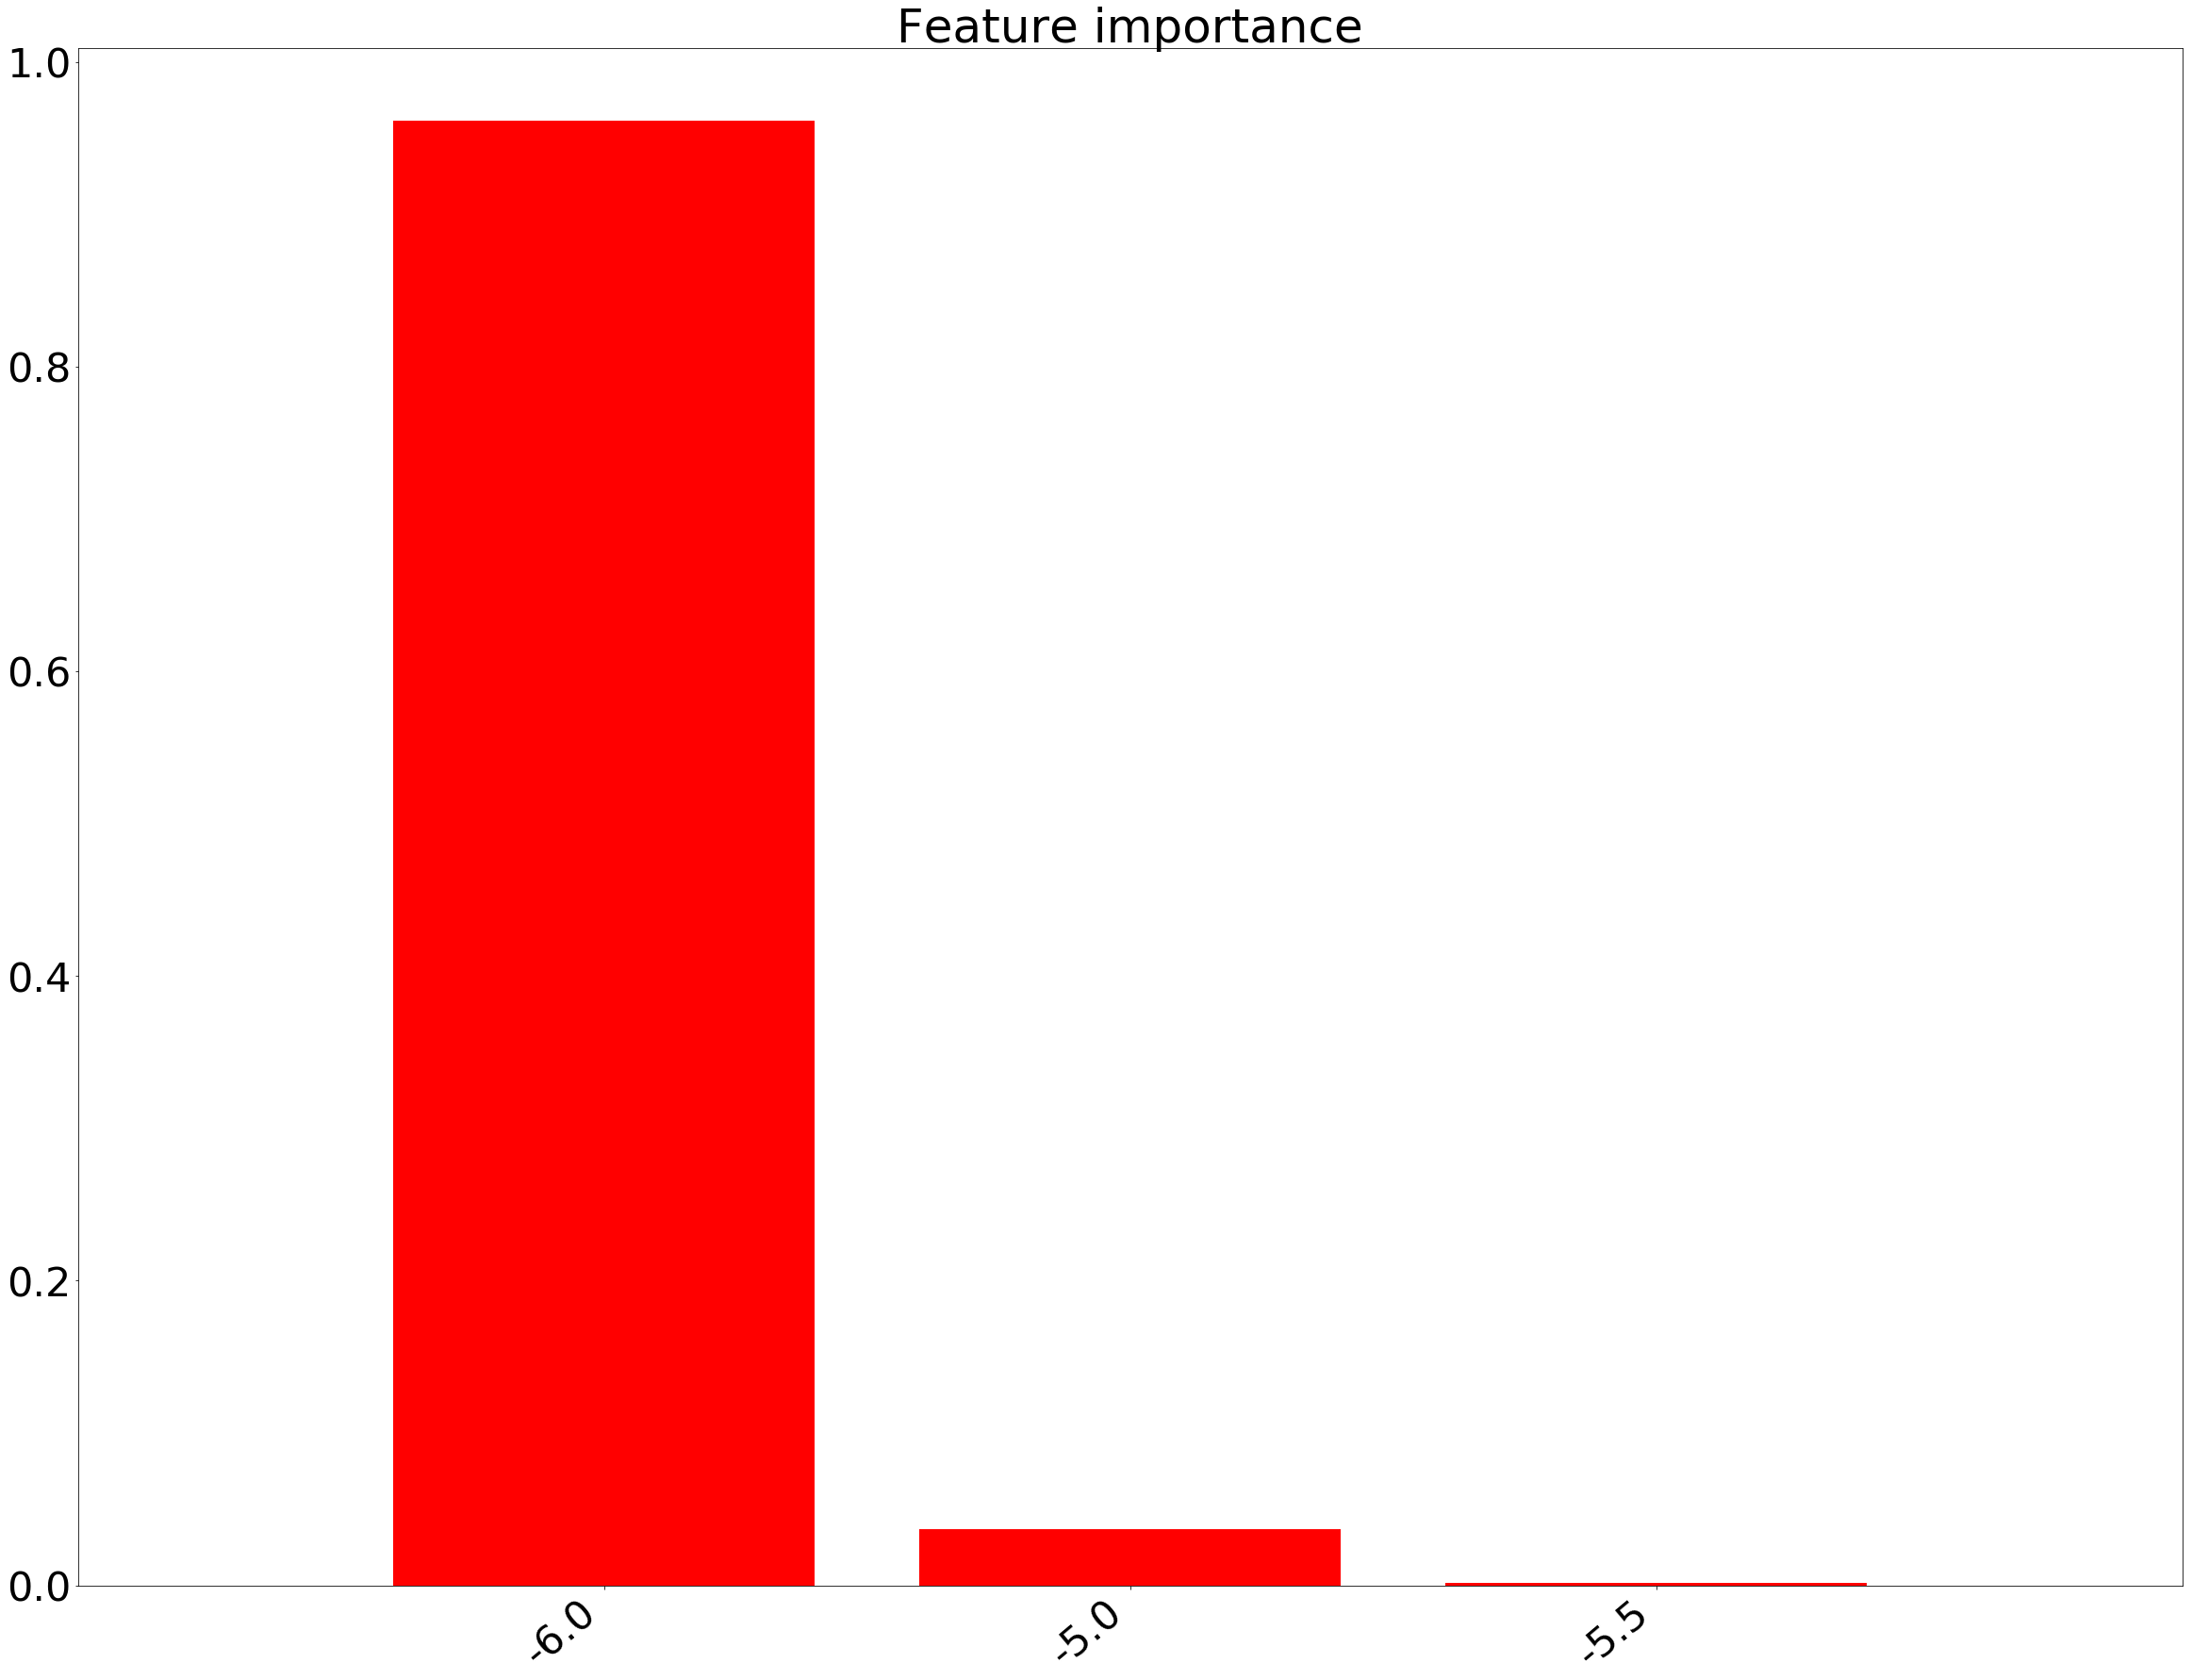

In [36]:
feat_imp(X, rfr, 3)

In [30]:
y_pred

array([[  1.21995356e+02,   1.30096471e+02,   1.36182306e+02,
          1.40795436e+02],
       [  2.07859877e+02,   2.09163479e+02,   2.17152889e+02,
          2.20799600e+02],
       [ -3.83933761e+01,  -4.27383197e+01,  -4.61486532e+01,
         -5.19771003e+01],
       ..., 
       [  1.56180705e+02,   1.58264676e+02,   1.61483985e+02,
          1.64235764e+02],
       [  1.70714314e-01,   8.85115016e-01,   1.36400478e+00,
          1.55182901e+00],
       [  1.75650253e+02,   1.79434164e+02,   1.85717622e+02,
          1.95456135e+02]])